<a href="https://colab.research.google.com/github/Dhineshks/Imageclassification-tensorflow/blob/master/flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
import glob
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract = True    
)
base_dir = os.path.join(os.path.dirname(zip_file),'flower_photos')

In [0]:
classes = ['roses','daisy','dandelion','sunflowers','tulips']

In [10]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images


Error: ignored

In [0]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [0]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#rescaling the image using ImageDataGenerator
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [35]:
#generating the rescaled image data from train_dir according to batch size
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE),
                                                           class_mode='binary')

Found 2935 images belonging to 5 classes.


In [36]:
#generating the rescaled image data from val_dir according to batch size

val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=val_dir,
                                                              shuffle=True,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE),
                                                              class_mode='binary')

Found 735 images belonging to 5 classes.


In [0]:
sample_training_image, _ = next(train_data_gen)

In [0]:
def plotImages(images_arr):
  fig,axes = plt.subplots(1,5, figsize = (20,20))
  axes = axes.flatten()
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

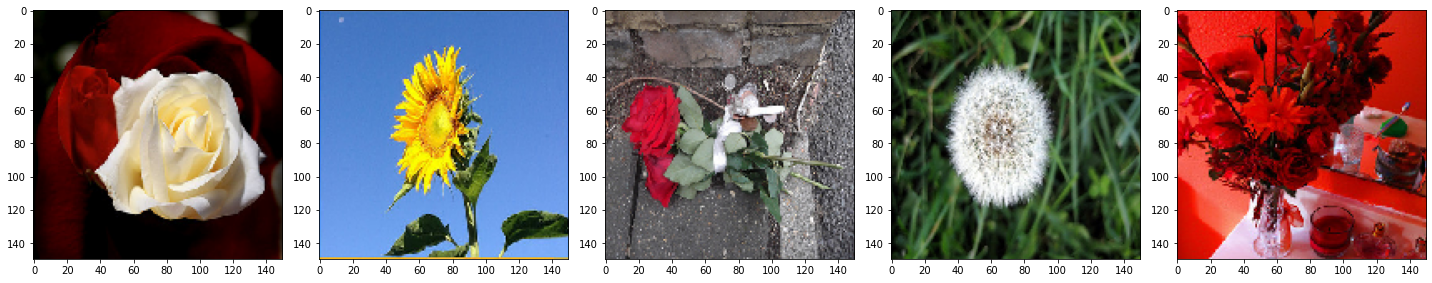

In [37]:
#plotting the first five images
plotImages(sample_training_image[:5])

In [38]:
#Image augumentation is done on  rescaled images
#Image augumentation - Horizontal flip
image_gen = ImageDataGenerator(rescale= 1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory= train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2935 images belonging to 5 classes.


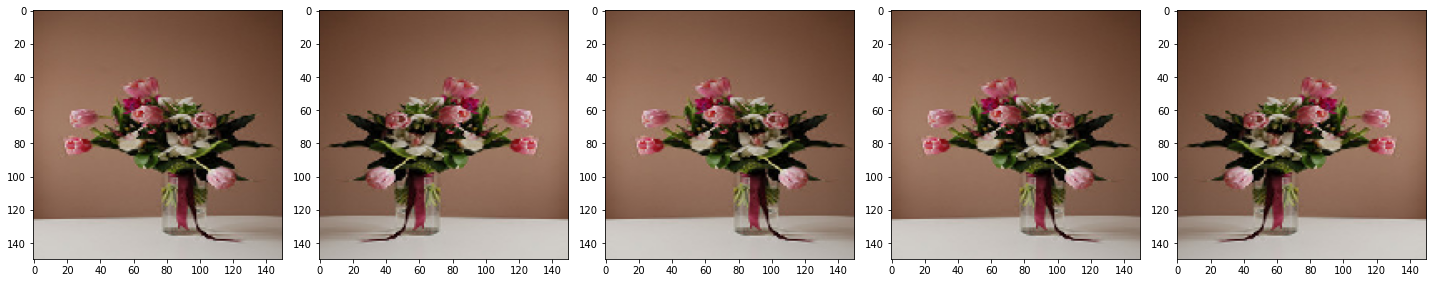

In [28]:
augumented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augumented_images)

In [39]:
image_gen = ImageDataGenerator(rescale= 1./255 , rotation_range=45)
#Image augumentation - Rotation of images
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2935 images belonging to 5 classes.


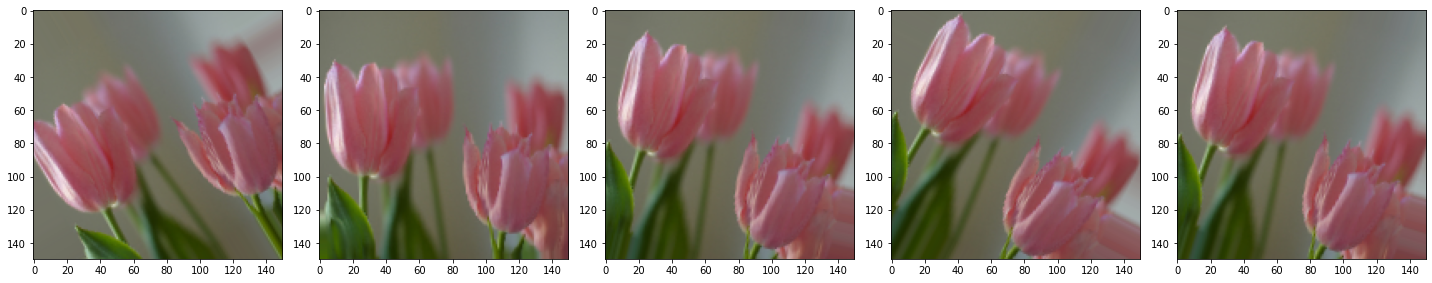

In [31]:
augumented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augumented_images)

In [40]:
image_gen = ImageDataGenerator(rescale= 1./255, zoom_range= 0.5)
#Image augumentation - zoomed images
train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory = train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2935 images belonging to 5 classes.


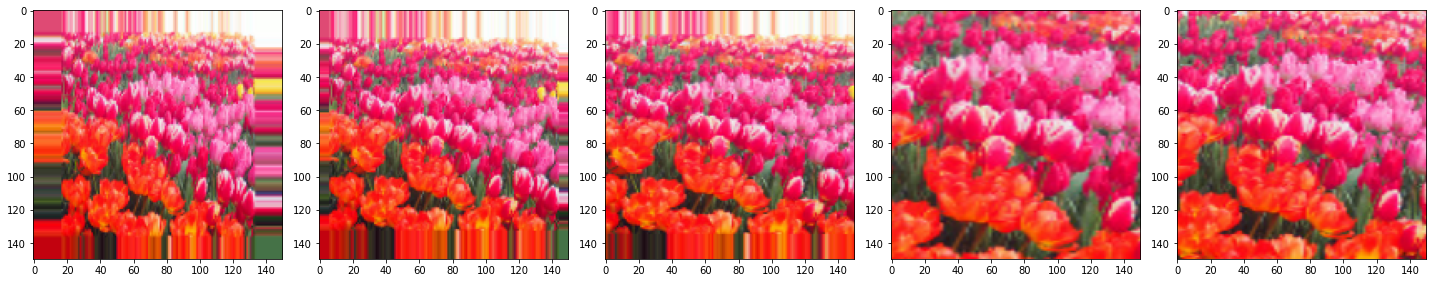

In [33]:
augumented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augumented_images)

In [41]:
#image augumentation
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range= 45,
    width_shift_range= 0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range=0.5,
    horizontal_flip = True,
    fill_mode='nearest'
)
train_data_gen = image_gen_train.flow_from_directory(batch_size= BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size = (IMG_SHAPE,IMG_SHAPE),
                                                     class_mode = 'binary')

Found 2935 images belonging to 5 classes.


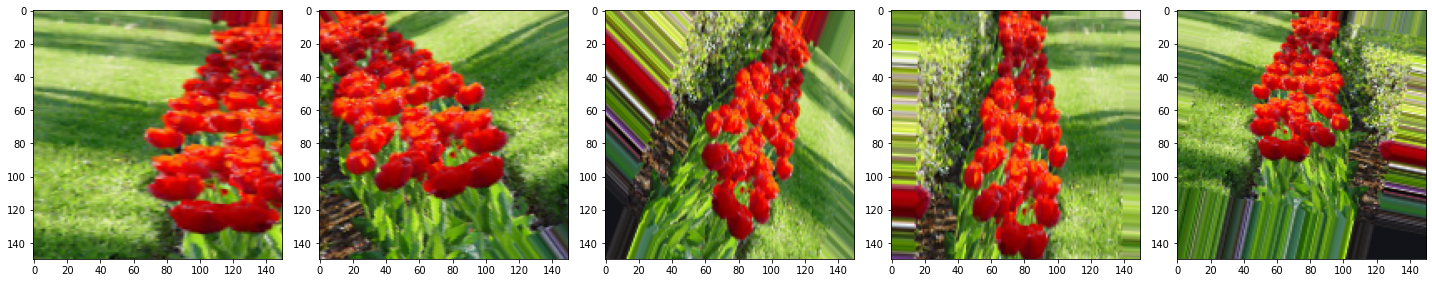

In [42]:
augumented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augumented_images)